In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def create_flowchart_corrected():
    """
    Generates and saves a corrected flowchart of the Agentic NLP Workflow.
    This version fixes the TypeError for 'connectionstyle'.
    """
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.set_aspect('equal')
    ax.axis('off')

    # Define styles for boxes and text
    box_style = dict(boxstyle="round,pad=0.5", fc="lightblue", ec="royalblue", lw=2, alpha=0.7)
    
    # CORRECTED: Removed 'connectionstyle' from the base arrow style dictionary
    arrow_style = dict(arrowstyle="-|>", ec="gray", fc="gray", lw=2)

    # --- Define Box Positions ---
    # (x_center, y_center)
    positions = {
        "input": (0, 10),
        "semantic": (-6, 7),
        "fact_check": (0, 7),
        "pattern": (6, 7),
        "orchestrator": (0, 3),
        "output": (0, 0)
    }

    # --- Define Box Content ---
    box_texts = {
        "input": "Input Datapoint\n(src, tgt, hyp)",
        "semantic": "1. Semantic Analysis Agent\nModel: all-MiniLM-L6-v2\n(Checks for meaning similarity)",
        "fact_check": "2. Fact-Checking Agent\nModel: nli-deberta-v3-xsmall\n(Checks for contradictions)",
        "pattern": "3. Pattern Recognition Agent\nModel: LightGBM/XGBoost\n(Checks for linguistic patterns)",
        "orchestrator": "4. Orchestrator Agent\nModel: Logistic Regression\n(Weighs evidence from all agents)",
        "output": "Final Output\n(Probability Score & Binary Label)"
    }
    
    # --- Draw Boxes ---
    boxes = {}
    for key, pos in positions.items():
        boxes[key] = ax.text(pos[0], pos[1], box_texts[key], ha="center", va="center", 
                             bbox=box_style, wrap=True, fontsize=12)

    # --- Draw Connections ---
    # From Input to the three parallel agents
    for agent_key in ["semantic", "fact_check", "pattern"]:
        # The connectionstyle is now only defined here
        connectionstyle = "arc3,rad=0.2" if agent_key != "fact_check" else "arc3,rad=0"
        arrow = patches.ConnectionPatch(
            positions["input"], 
            positions[agent_key], 
            coordsA='data', 
            coordsB='data',
            axesA=ax, 
            axesB=ax, 
            connectionstyle=connectionstyle,
            **arrow_style
        )
        ax.add_patch(arrow)

    # From the three parallel agents to the Orchestrator
    for agent_key in ["semantic", "fact_check", "pattern"]:
        # The connectionstyle is now only defined here
        connectionstyle = "arc3,rad=-0.2" if agent_key != "fact_check" else "arc3,rad=0"
        arrow = patches.ConnectionPatch(
            positions[agent_key], 
            positions["orchestrator"], 
            coordsA='data', 
            coordsB='data',
            axesA=ax, 
            axesB=ax, 
            connectionstyle=connectionstyle,
            **arrow_style
        )
        ax.add_patch(arrow)

    # From Orchestrator to Final Output
    arrow = patches.ConnectionPatch(
        positions["orchestrator"], 
        positions["output"], 
        coordsA='data', 
        coordsB='data',
        axesA=ax, 
        axesB=ax, 
        connectionstyle="arc3,rad=0", # Straight line
        **arrow_style
    )
    ax.add_patch(arrow)

    # --- Final Touches ---
    ax.set_xlim(-10, 10)
    ax.set_ylim(-1, 12)
    plt.title("Agentic NLP Workflow for Hallucination Detection", fontsize=20, pad=20)
    
    # Save the figure
    plt.savefig("matplotlib_workflow_corrected.png", bbox_inches='tight', dpi=150)
    print("Corrected flowchart saved as matplotlib_workflow_corrected.png")
    
    # Display the plot
    plt.show()

# --- Run the corrected function ---


Corrected flowchart saved as matplotlib_workflow_corrected.png


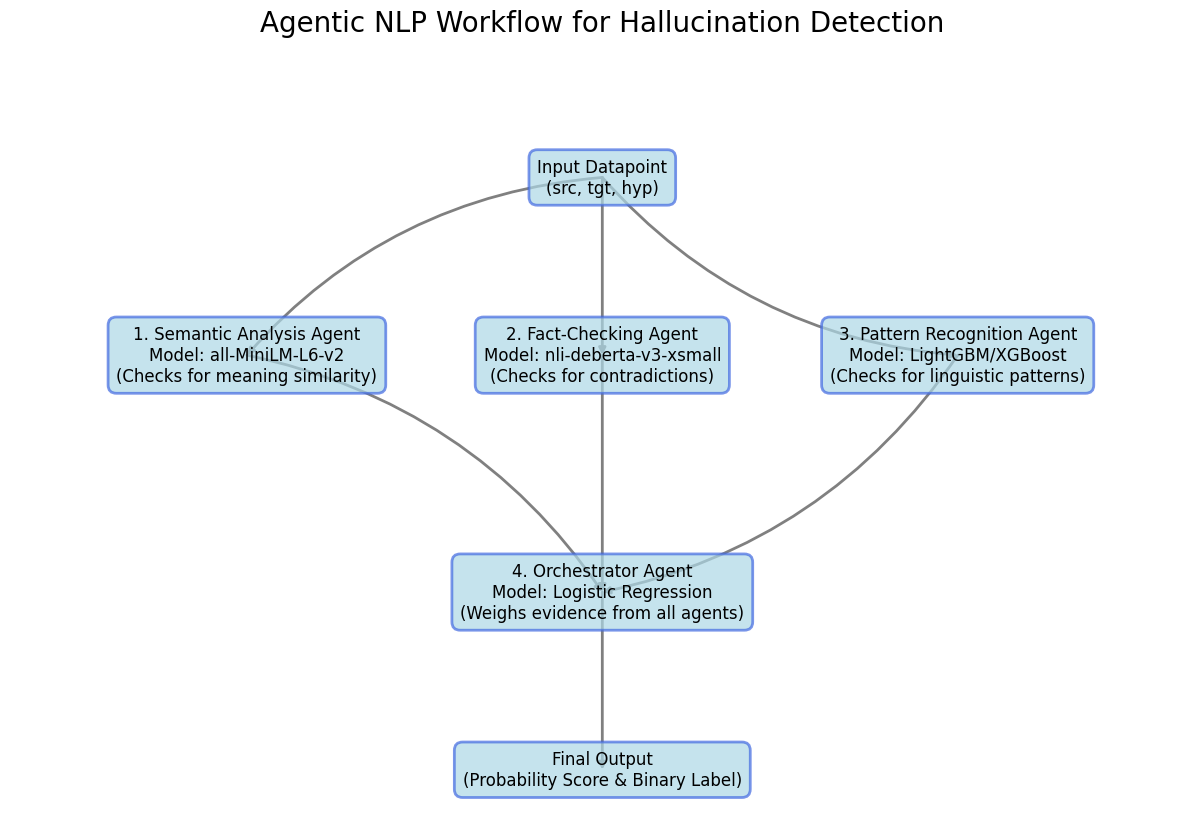

In [6]:
create_flowchart_corrected()

Evaluation flowchart saved as evaluation_flowchart.png


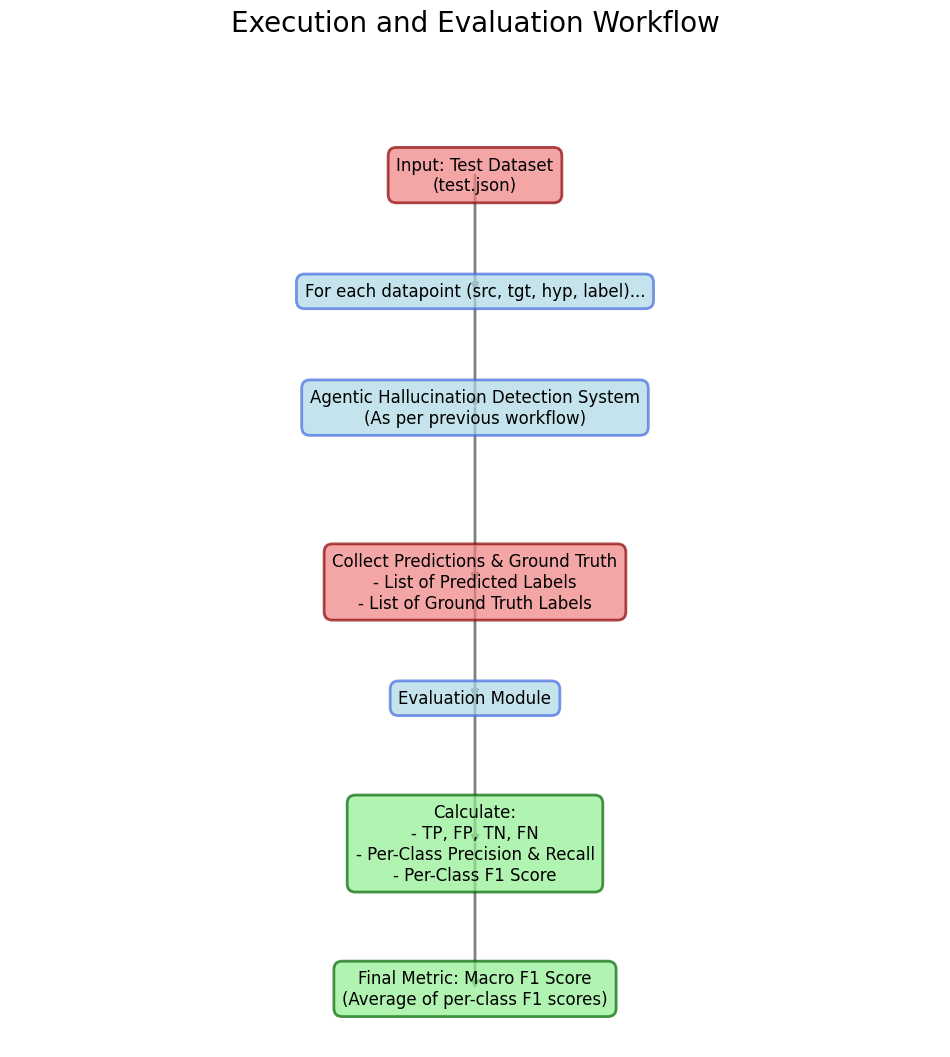

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def create_evaluation_flowchart():
    """
    Generates and saves a flowchart of the model evaluation process.
    """
    fig, ax = plt.subplots(figsize=(12, 16))
    ax.set_aspect('equal')
    ax.axis('off')

    # --- Define Styles ---
    # Style for data/input/output boxes
    data_style = dict(boxstyle="round,pad=0.5", fc="lightcoral", ec="darkred", lw=2, alpha=0.7)
    # Style for process boxes
    process_style = dict(boxstyle="round,pad=0.5", fc="lightblue", ec="royalblue", lw=2, alpha=0.7)
    # Style for metric boxes
    metric_style = dict(boxstyle="round,pad=0.5", fc="lightgreen", ec="darkgreen", lw=2, alpha=0.7)
    
    arrow_style = dict(arrowstyle="-|>", ec="gray", fc="gray", lw=2, connectionstyle="arc3,rad=0")

    # --- Define Box Positions ---
    # (x_center, y_center)
    positions = {
        "test_data": (0, 14),
        "loop": (0, 12),
        "system": (0, 10),
        "collect": (0, 7),
        "evaluation": (0, 5),
        "metrics": (0, 2.5),
        "final_score": (0, 0)
    }

    # --- Define Box Content ---
    box_texts = {
        "test_data": "Input: Test Dataset\n(test.json)",
        "loop": "For each datapoint (src, tgt, hyp, label)...",
        "system": "Agentic Hallucination Detection System\n(As per previous workflow)",
        "collect": "Collect Predictions & Ground Truth\n- List of Predicted Labels\n- List of Ground Truth Labels",
        "evaluation": "Evaluation Module",
        "metrics": "Calculate:\n- TP, FP, TN, FN\n- Per-Class Precision & Recall\n- Per-Class F1 Score",
        "final_score": "Final Metric: Macro F1 Score\n(Average of per-class F1 scores)"
    }

    # --- Draw Boxes ---
    ax.text(positions["test_data"][0], positions["test_data"][1], box_texts["test_data"], ha="center", va="center", bbox=data_style, fontsize=12)
    ax.text(positions["loop"][0], positions["loop"][1], box_texts["loop"], ha="center", va="center", bbox=process_style, fontsize=12)
    ax.text(positions["system"][0], positions["system"][1], box_texts["system"], ha="center", va="center", bbox=process_style, fontsize=12)
    ax.text(positions["collect"][0], positions["collect"][1], box_texts["collect"], ha="center", va="center", bbox=data_style, fontsize=12)
    ax.text(positions["evaluation"][0], positions["evaluation"][1], box_texts["evaluation"], ha="center", va="center", bbox=process_style, fontsize=12)
    ax.text(positions["metrics"][0], positions["metrics"][1], box_texts["metrics"], ha="center", va="center", bbox=metric_style, fontsize=12)
    ax.text(positions["final_score"][0], positions["final_score"][1], box_texts["final_score"], ha="center", va="center", bbox=metric_style, fontsize=12)
    
    # --- Draw Connections ---
    for start, end in [("test_data", "loop"), ("loop", "system"), ("system", "collect"), 
                       ("collect", "evaluation"), ("evaluation", "metrics"), ("metrics", "final_score")]:
        arrow = patches.ConnectionPatch(
            positions[start], 
            positions[end], 
            coordsA='data', 
            coordsB='data',
            axesA=ax, 
            axesB=ax, 
            **arrow_style
        )
        ax.add_patch(arrow)

    # --- Final Touches ---
    ax.set_xlim(-8, 8)
    ax.set_ylim(-1, 16)
    plt.title("Execution and Evaluation Workflow", fontsize=20, pad=20)
    plt.savefig("evaluation_flowchart.png", bbox_inches='tight', dpi=150)
    print("Evaluation flowchart saved as evaluation_flowchart.png")
    plt.show()

# --- Run the function ---
create_evaluation_flowchart()